# CreditScore Problem Muliticlass part

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from matplotlib.colors import ListedColormap 
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import KernelPCA

In [2]:
df = pd.read_csv('https://github.com/zhli3378/IE598_Machine_Learning_in_Fin_Lab/raw/master/IE598_F18_Final_project/MLF_GP1_CreditScore.csv')
df.head()

,Sales/Revenues,Gross Margin,EBITDA,EBITDA Margin,Net Income Before Extras,Total Debt,Net Debt,LT Debt,ST Debt,Cash,...,Interest Coverage,Total Liquidity,Current Liquidity,Current Liabilities,EPS Before Extras,PE,ROA,ROE,InvGrd,Rating
0,-0.005496,0.030763,0.018885,0.024515,0.146849,-0.029710,-0.019296,-0.042648,0.049875,-0.133716,...,0.136748,0.392143,-0.184887,0.062781,0.148305,0.100409,0.163266,0.102521,1,A1
1,-0.005496,0.030763,0.088716,0.094733,0.146849,-0.029710,-0.019296,-0.042648,0.049875,-0.133716,...,0.214657,0.392143,-0.184887,0.062781,0.148305,-0.089598,0.163266,0.102521,1,A1
2,-0.007045,0.023159,0.088716,0.096440,0.108590,0.039410,0.034268,0.009059,0.250371,0.101315,...,0.205290,0.483257,-0.017877,0.121357,0.110656,-0.045142,0.105711,0.103378,1,A1
3,-0.009396,0.028400,0.088716,0.099046,0.146137,0.030071,0.036938,-0.016964,0.356994,-0.052606,...,0.232991,0.996955,-0.122017,0.079051,0.151639,-0.008231,0.162421,0.132295,1,A1
4,-0.009009,0.027714,0.088716,0.098611,0.123500,0.024224,0.034445,-0.034132,0.461894,-0.090869,...,0.172906,1.711426,-0.161561,0.084319,0.130435,0.015528,0.156427,0.225144,1,A1


## 1) Introduction/Exploratory Data Analysis

In [3]:
df_columns = ['Sales/Revenues', 'Gross Margin', 'EBITDA',
              'EBITDA Margin', 'Net Income Before Extras',
              'Total Debt', 'Net Debt', 'LT Debt',
              'ST Dets', 'Cash', 'Free Cash Flow',
              'Total Debt/EBITDA', 'Net Debt/EBITDA',
              'Total MV', 'Total Debt/MV', 'Net Debt/MV',
              'CFO/Debt', 'CFO', 'Interest Coverage',
              'Total Liquidity', 'Current Liquidity',
              'Current Liabilities', 'EPS Before Extras',
              'PE', 'ROA', 'ROE']

In [4]:
df.describe()

,Sales/Revenues,Gross Margin,EBITDA,EBITDA Margin,Net Income Before Extras,Total Debt,Net Debt,LT Debt,ST Debt,Cash,...,CFO,Interest Coverage,Total Liquidity,Current Liquidity,Current Liabilities,EPS Before Extras,PE,ROA,ROE,InvGrd
count,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,...,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
mean,0.050378,0.026007,0.068718,0.021074,0.123026,0.822405,-0.419810,1.255168,3.142797,0.466620,...,-0.189317,0.298785,-0.855714,0.436002,0.072802,0.032196,0.497705,0.019394,-0.217604,0.757059
std,0.161910,0.273768,0.237365,0.189025,14.475689,13.317075,28.385702,16.224453,51.986550,1.859494,...,5.668669,5.265291,22.926862,1.904282,0.266471,6.151994,12.102502,14.594193,15.389000,0.428986
min,-0.661715,-0.794722,-0.782254,-0.805153,-289.000000,-0.903014,-493.305578,-0.921515,-0.997692,-0.990982,...,-161.609425,-0.991976,-502.000000,-0.994141,-0.684678,-96.250000,-59.795133,-305.462167,-373.837267,0.000000
25%,-0.005693,-0.020028,-0.022640,-0.042771,-0.158478,-0.076316,-0.120725,-0.094767,-0.337959,-0.195117,...,-0.115159,-0.096996,-0.857013,-0.227327,-0.072734,-0.152894,-0.293521,-0.208483,-0.233955,1.000000
50%,0.034000,0.003403,0.049482,0.011134,0.056627,0.005886,-0.003060,-0.002078,0.043092,0.075820,...,0.046983,0.043216,-0.229098,0.040446,0.041785,0.066027,-0.040405,-0.009403,-0.020392,1.000000
75%,0.083004,0.025595,0.124533,0.060566,0.222219,0.136449,0.160251,0.174735,0.649475,0.483113,...,0.216432,0.177340,0.512778,0.416067,0.161215,0.236046,0.168897,0.156136,0.201596,1.000000
max,2.277229,3.202713,3.542425,4.141182,478.280075,281.604237,865.194595,289.388178,2038.000000,36.980037,...,13.005788,182.131887,280.138728,34.372455,4.194381,187.000000,381.243282,474.847172,343.145356,1.000000


/Users/AdrianLee/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


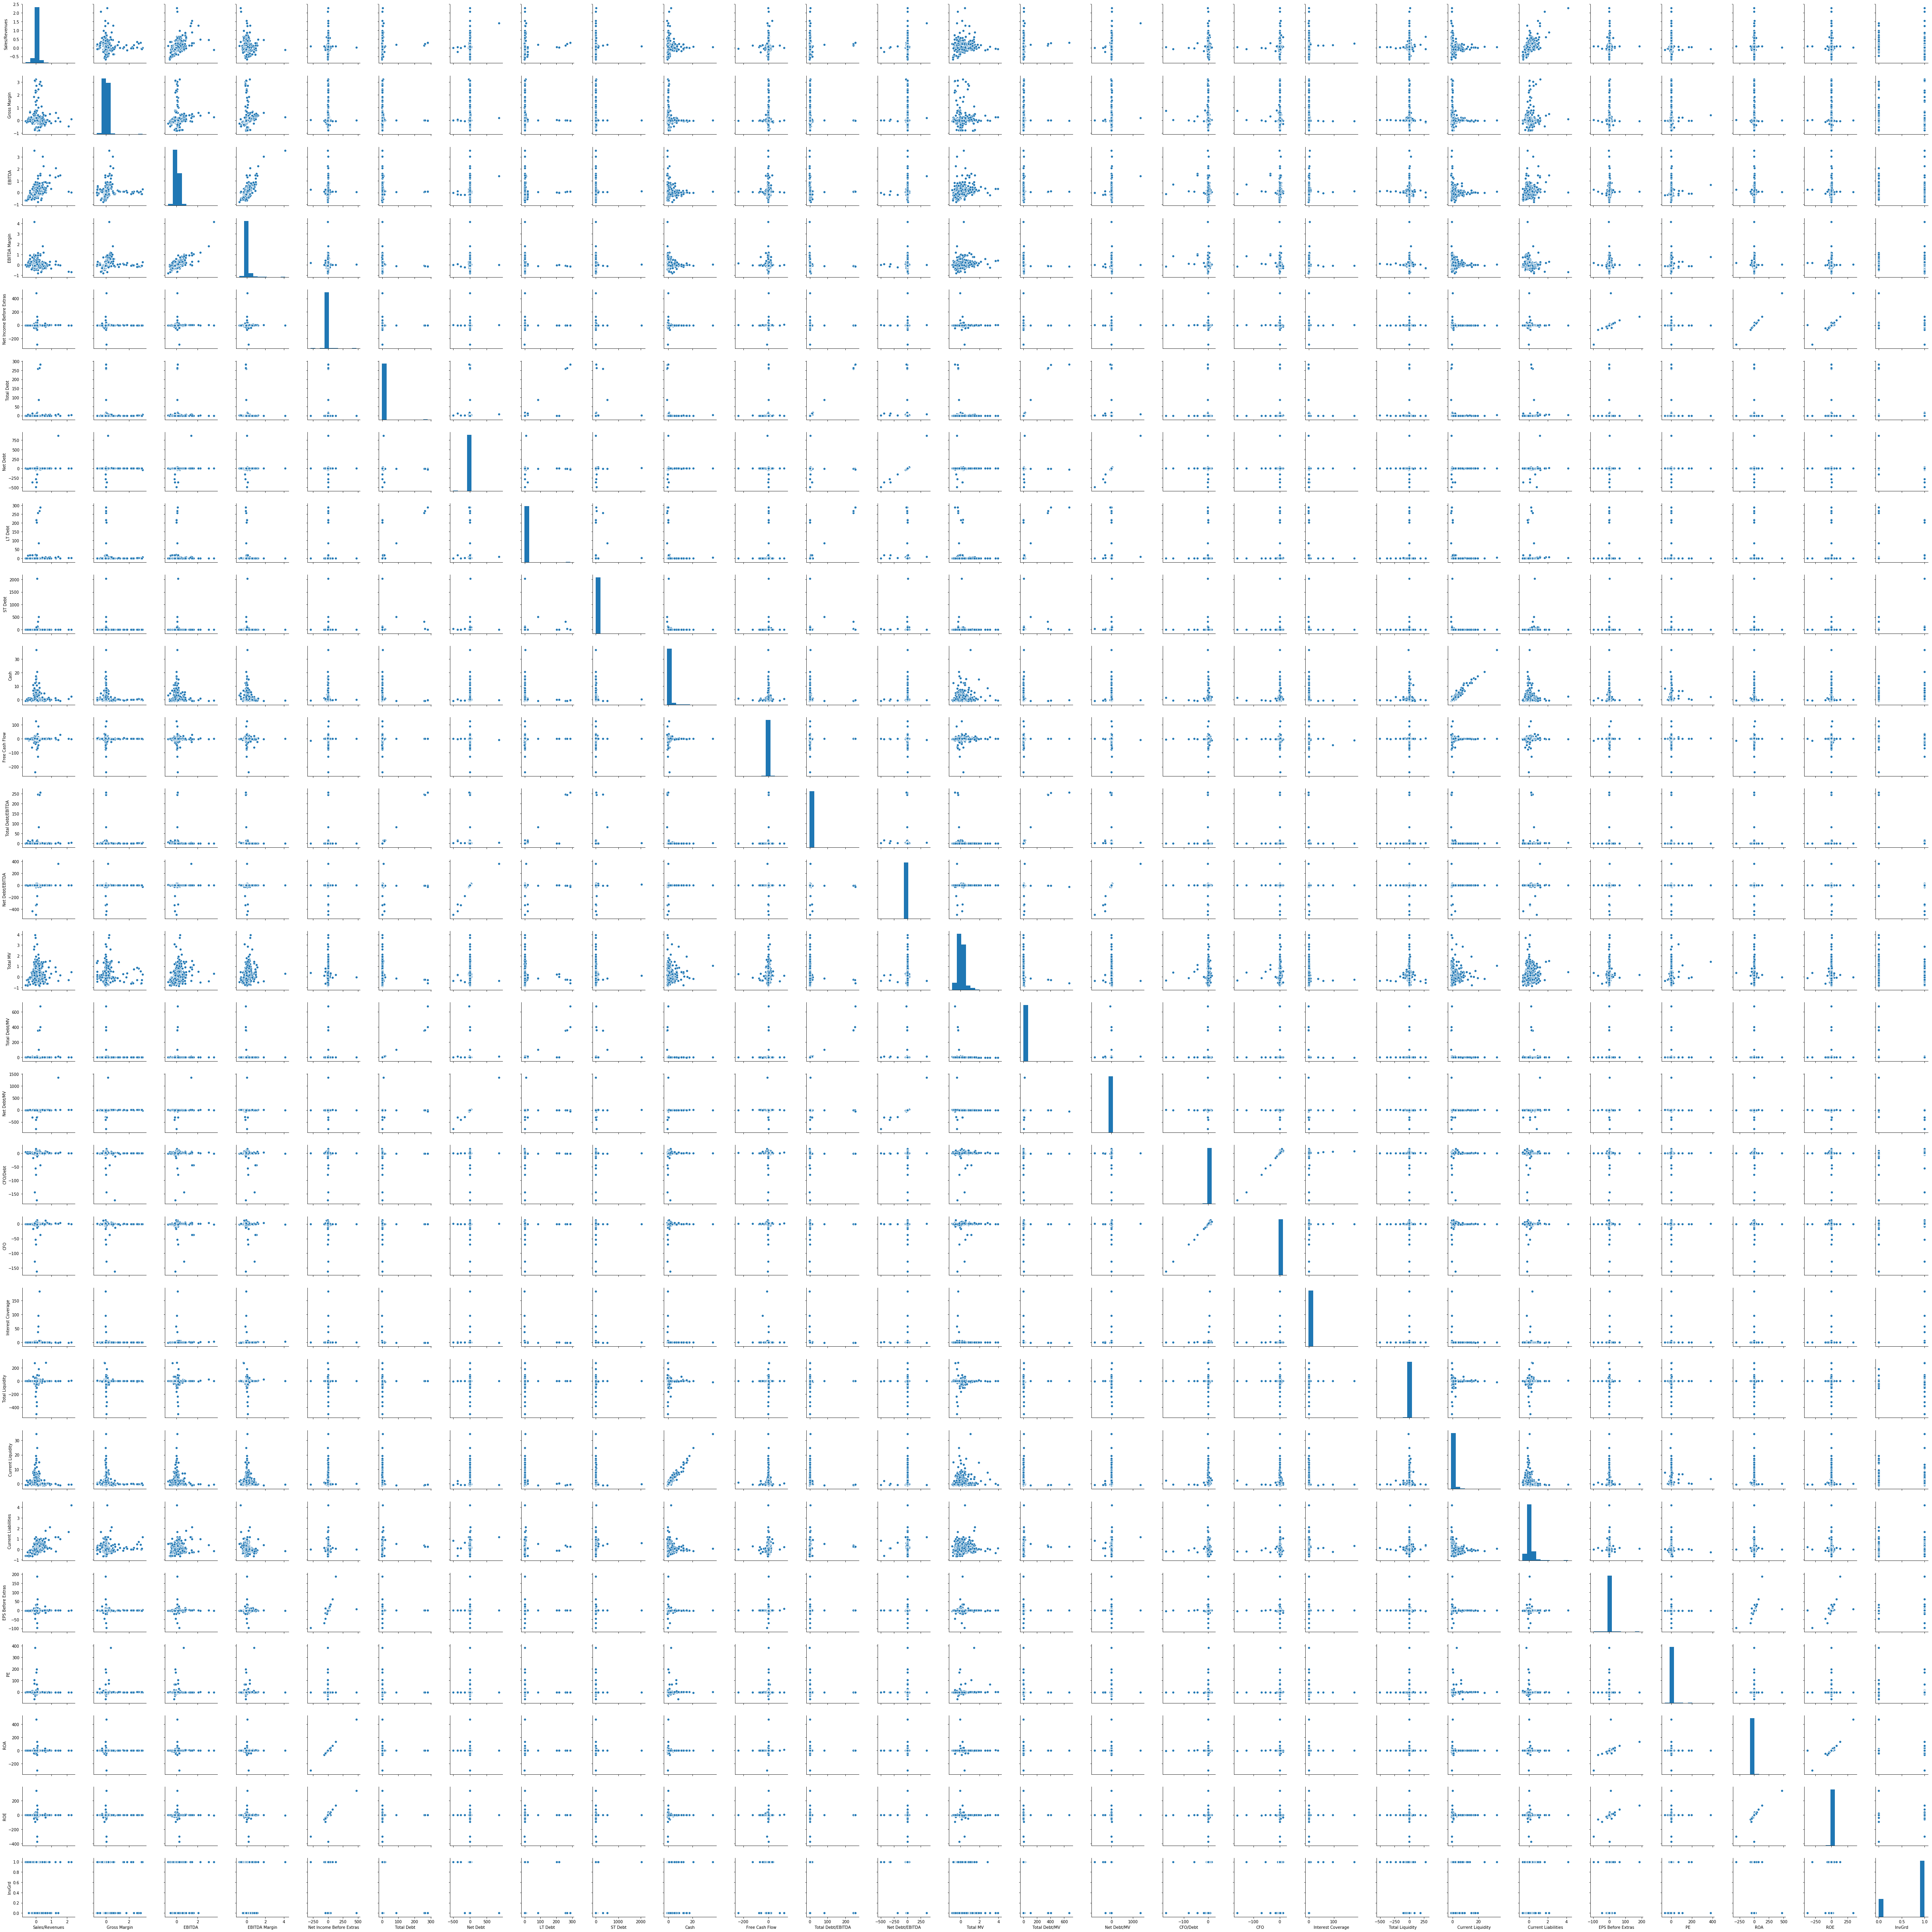

In [6]:
sns.pairplot(df, size=2.5)
plt.tight_layout()
plt.show()

In [ ]:
cm = np.corrcoef(df.iloc[:, 0:27].values)
sns.set(font_scale = 1)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size':5},
                 yticklabels=df_columns,
                 xticklabels=df_columns,
                 )
plt.show()

## 2) Preprocessing, feature extraction, feature selection

In [ ]:
X, y = df.iloc[:, 0:26].values, df.iloc[:, 27]
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print('Class labels:', np.unique(y))

In [ ]:
df.iloc[:, 24:26]

## Feature Extraction

### Logistic Regression

In [ ]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
lr = LogisticRegression(C=100.0, random_state=1)
lr.fit(X_train_std, y_train)
y_train_pred = lr.predict(X_train_std)
y_pred = lr.predict(X_test_std)
print('Accuracy score of train set: %.2f' % metrics.accuracy_score(y_train, y_train_pred))
print('Accuracy score of test set: %.2f' % metrics.accuracy_score(y_test, y_pred))

### SVM classifier

In [ ]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)
y_train_pred = svm.predict(X_train_std)
y_pred = svm.predict(X_test_std)
print('Accuracy score of train set: %.2f' % metrics.accuracy_score(y_train, y_train_pred))
print('Accuracy score of test set: %.2f' % metrics.accuracy_score(y_test, y_pred))

### Perform a PCA on both datasets

In [ ]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

#### Logistic Regression via PCA

In [ ]:
lr.fit(X_train_pca, y_train)
y_train_pred = lr.predict(X_train_pca)
y_pred = lr.predict(X_test_pca)
print('Accuracy score of train set: %.2f' % metrics.accuracy_score(y_train, y_train_pred))
print('Accuracy score of test set: %.2f' % metrics.accuracy_score(y_test, y_pred))

#### SVM via PCA

In [ ]:
svm.fit(X_train_pca, y_train)
y_train_pred = svm.predict(X_train_pca)
y_pred = svm.predict(X_test_pca)
print('Accuracy score of train set: %.2f' % metrics.accuracy_score(y_train, y_train_pred))
print('Accuracy score of test set: %.2f' % metrics.accuracy_score(y_test, y_pred))

## Feature Selection

In [ ]:
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)
lr = LogisticRegression(penalty='l1', C=1.0)
lr.fit(X_train_std, y_train)
print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))

In [ ]:
lr.intercept_

In [ ]:
lr.coef_

In [ ]:
fig = plt.figure()
ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'cyan',
          'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 
          'gray', 'indigo', 'orange','darkblue',
         'maroon','cadetblue','tan','chocolate',
         'olive','darkgreen','darkred','darkorange',
         'violet','lightskyblue','limegreen','teal']
weights, params = [], []
for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l1',
                            C=10.**c,
                            random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=df_columns[column],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center',
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
plt.show()

## 3) Model fitting and evaluation

#### Perceptron Model

In [ ]:
X, y = df.iloc[:, 0:26].values, df.iloc[:, 27]
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.1, random_state=0, stratify=y)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

#### Decision Tree

In [ ]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

X, y = df.iloc[:, 24:26].values, df.iloc[:, 27]
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.1, random_state=0, stratify=y)
tree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
tree.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, classifier=tree, test_idx=range(105, 150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()